In [1]:
import sys
sys.path.insert(0, '..')
%load_ext autoreload
%autoreload 2
%aimport std_func

# Hide warnings
import warnings
warnings.filterwarnings("ignore")

## Estimates from Cosine Similarity
We want to evaluate the feasibility of constructing optimized portfolios with the word embedding results. Our first estimate on the textual analysis is generating optimal portfolios using cosine similarity distances. We use the cosine similarity distance as correlation and sample return standard deviation to calculate the covariance estimate. We will compare the results at the end of this section to determine the feasibility.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
r_selected = pd.read_csv("data/filtered_r.csv")
# get the mean of all 
r_selected.set_index("name", inplace = True)
mu = r_selected.mean(axis = 1)
# compute the covariance matrix 
cov = r_selected.T.cov()

### Cosine Similarity Distances
We conduct cosine similarity analysis with 2-to-4 grams embeddings on the business description of each company for all top 5 SIC industry. First, we generate the words counting matrix and perform cosine similarity anlaysis to calculate the distances, which will be used as the correlation between companies in the next step for generating covarince estimate. 

In [4]:
df = pd.read_csv('../data/preprocessed.csv',
                 usecols = ['reportingDate', 'name', 'CIK',
                           'coDescription_stopwords', 'SIC', 'SIC_desc'])
df = df.set_index(df.name)

#### Words Count
For this cosine similarity analysis, we generate sequences of 2 to 4 words as one term and only select the top 600 terms by frequency.

In [5]:
from sklearn.feature_extraction.text import CountVectorizer

Vectorizer = CountVectorizer(ngram_range = (2,4), 
                             max_features = 600)

count_data = Vectorizer.fit_transform(df['coDescription_stopwords'])
wordsCount = pd.DataFrame(count_data.toarray(),columns=Vectorizer.get_feature_names())
wordsCount = wordsCount.set_index(df['name'])
wordsCount

,ability make,accounting standard,acquire property,act act,act amended,additional information,adequately capitalized,adverse effect,adverse effect business,adverse event,...,wa million,weighted average,well capitalized,wholly owned,wholly owned subsidiary,wide range,within day,working interest,year ended,year ended december
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,3,0,0,5,0
SALESFORCE COM INC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SPLUNK INC,0,0,0,0,1,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
"OKTA, INC.",0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
VEEVA SYSTEMS INC,0,12,0,1,4,1,0,7,4,0,...,18,4,0,0,0,0,1,0,102,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0,0,1,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,2,2
"CYCLACEL PHARMACEUTICALS, INC.",0,0,0,0,0,1,0,1,0,1,...,0,0,0,0,0,0,1,0,0,0
ZOETIS INC.,0,17,0,0,0,12,0,3,0,0,...,20,5,0,1,1,0,2,0,84,83


#### Cosine Similarity Computation

In [6]:
# Compute Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity
cosine_sim = pd.DataFrame(cosine_similarity(wordsCount, wordsCount))
cosine_sim = cosine_sim.set_index(df['name'])
cosine_sim.columns = df['name']
cosine_sim

name,"MONGODB, INC.",SALESFORCE COM INC,SPLUNK INC,"OKTA, INC.",VEEVA SYSTEMS INC,AUTODESK INC,"INTERNATIONAL WESTERN PETROLEUM, INC.","DAYBREAK OIL & GAS, INC.","ETERNAL SPEECH, INC.","ETERNAL SPEECH, INC.",...,OMEGA HEALTHCARE INVESTORS INC,TABLEAU SOFTWARE INC,HORIZON PHARMA PLC,MERRIMACK PHARMACEUTICALS INC,"REVEN HOUSING REIT, INC.","AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.","CYCLACEL PHARMACEUTICALS, INC.",ZOETIS INC.,"STAG INDUSTRIAL, INC.",EQUINIX INC
name,,,,,,,,,,,,,,,,,,,,,
"MONGODB, INC.",1.000000,0.445455,0.610272,0.620961,0.500762,0.338268,0.065380,0.052345,0.000000,0.000000,...,0.050935,0.630465,0.436327,0.143385,0.066598,0.135839,0.144678,0.189609,0.178397,0.102958
SALESFORCE COM INC,0.445455,1.000000,0.635969,0.455189,0.196053,0.418546,0.043515,0.064999,0.000000,0.000000,...,0.029326,0.492079,0.300027,0.133831,0.201221,0.201230,0.145089,0.075038,0.277952,0.354856
SPLUNK INC,0.610272,0.635969,1.000000,0.665648,0.274023,0.373142,0.019112,0.073553,0.000000,0.000000,...,0.018032,0.569939,0.330028,0.116923,0.109538,0.142041,0.128467,0.136418,0.194072,0.273502
"OKTA, INC.",0.620961,0.455189,0.665648,1.000000,0.195672,0.399874,0.013240,0.093942,0.000000,0.000000,...,0.013905,0.579884,0.541775,0.163709,0.109948,0.144051,0.170361,0.111937,0.163588,0.074624
VEEVA SYSTEMS INC,0.500762,0.196053,0.274023,0.195672,1.000000,0.079927,0.074096,0.030179,0.075713,0.075713,...,0.424046,0.280852,0.153335,0.083683,0.128762,0.211695,0.060273,0.501041,0.332207,0.064207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"AMERICAN REALTY CAPITAL NEW YORK CITY REIT, INC.",0.135839,0.201230,0.142041,0.144051,0.211695,0.106627,0.027594,0.048087,0.000000,0.000000,...,0.284525,0.114080,0.075274,0.048741,0.578793,1.000000,0.039971,0.136184,0.471651,0.042298
"CYCLACEL PHARMACEUTICALS, INC.",0.144678,0.145089,0.128467,0.170361,0.060273,0.094262,0.010770,0.025407,0.000000,0.000000,...,0.015318,0.193458,0.462759,0.683597,0.047288,0.039971,1.000000,0.035694,0.080139,0.013121
ZOETIS INC.,0.189609,0.075038,0.136418,0.111937,0.501041,0.069267,0.039015,0.022235,0.065917,0.065917,...,0.159082,0.327556,0.148224,0.051060,0.163391,0.136184,0.035694,1.000000,0.207232,0.031911


### Perform Mean-Variance Analysis
We only use the Pharmaceutical Preparations industry data to generate portfolio based on Mean-Variance Analysis. We calculate the covariance estimate with cosine similarity distance as correlation and the sample standard deviation of returns. Then we use the sample return and estimated covariance to build efficient frontier.

In [7]:
!pip install PyPortfolioOpt

In [8]:
from pypfopt import EfficientFrontier
from pypfopt import risk_models
from pypfopt import expected_returns
from pypfopt import objective_functions
from pypfopt import plotting

In [9]:
# get the names of the companies in the pharmaceutical preparations industry
Pharm = df[df.SIC == 2834]
Pharm_list = Pharm.index

In [10]:
# get the companies name that match return data and business description data
SET = (set(Pharm_list) & set(r_selected.index))
LIST = [*SET, ]

#### Sample Mean for the Pharmaceutical Preparations Industry

In [11]:
mu_Pharm = mu[LIST]
mu_Pharm

name
ONCOMED PHARMACEUTICALS INC     -0.065967
PAIN THERAPEUTICS INC           -0.028535
ARATANA THERAPEUTICS, INC.       0.003886
MERRIMACK PHARMACEUTICALS INC   -0.058560
XOMA CORP                        0.027546
                                   ...   
FIVE PRIME THERAPEUTICS INC     -0.038194
CHIASMA, INC                     0.018143
CYTOMX THERAPEUTICS, INC.        0.022405
FIBROGEN INC                     0.041085
IMMUNOGEN INC                    0.021513
Length: 124, dtype: float64

#### Sample Covariance for the Pharmaceutical Preparations Industry

In [12]:
tmp = cov[LIST].T
cov_Pharm = tmp[LIST]
cov_Pharm

name,ONCOMED PHARMACEUTICALS INC,PAIN THERAPEUTICS INC,"ARATANA THERAPEUTICS, INC.",MERRIMACK PHARMACEUTICALS INC,XOMA CORP,RXI PHARMACEUTICALS CORP,ZOETIS INC.,RIGEL PHARMACEUTICALS INC,ADAMIS PHARMACEUTICALS CORP,"HERON THERAPEUTICS, INC. /DE/",...,TREVENA INC,ANI PHARMACEUTICALS INC,EMERGENT BIOSOLUTIONS INC.,"HEAT BIOLOGICS, INC.","ACLARIS THERAPEUTICS, INC.",FIVE PRIME THERAPEUTICS INC,"CHIASMA, INC","CYTOMX THERAPEUTICS, INC.",FIBROGEN INC,IMMUNOGEN INC
name,,,,,,,,,,,,,,,,,,,,,
ONCOMED PHARMACEUTICALS INC,0.048878,-0.000931,0.001275,0.004409,0.012618,0.017153,0.000975,0.009694,0.017119,0.007419,...,0.010638,0.001603,0.006316,-0.000632,0.007241,0.006256,0.019129,0.008370,0.005447,0.015696
PAIN THERAPEUTICS INC,-0.000931,0.096589,0.001606,0.006854,0.033623,0.007920,0.002257,0.012022,0.012922,0.007795,...,0.009834,0.003528,0.000226,0.009508,-0.002683,0.000731,-0.009049,0.016650,0.005027,0.021935
"ARATANA THERAPEUTICS, INC.",0.001275,0.001606,0.018175,0.001068,-0.001690,-0.000869,0.001177,0.003725,0.007933,0.001289,...,0.008853,0.003584,0.005253,0.003301,-0.000389,0.002040,0.005878,-0.003932,-0.001835,0.001217
MERRIMACK PHARMACEUTICALS INC,0.004409,0.006854,0.001068,0.029222,0.012035,0.003731,0.001440,0.003683,0.005903,-0.000678,...,0.010761,0.004187,0.008454,0.010831,0.004913,0.010897,0.010060,0.008491,0.008858,0.006671
XOMA CORP,0.012618,0.033623,-0.001690,0.012035,0.068901,0.017559,0.001430,0.017215,0.017957,0.004936,...,0.006084,0.008308,0.006972,0.015210,0.004739,0.011927,0.010006,0.018039,0.017027,0.016578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FIVE PRIME THERAPEUTICS INC,0.006256,0.000731,0.002040,0.010897,0.011927,-0.000180,-0.000423,0.003905,0.010508,-0.003428,...,0.003368,0.005149,0.005823,0.016328,0.009482,0.022705,0.009991,0.003688,0.014721,0.003954
"CHIASMA, INC",0.019129,-0.009049,0.005878,0.010060,0.010006,-0.003906,0.001032,0.005843,0.014325,-0.001907,...,0.014641,-0.001768,0.008421,0.000472,-0.002684,0.009991,0.049106,0.002122,0.008078,0.010837
"CYTOMX THERAPEUTICS, INC.",0.008370,0.016650,-0.003932,0.008491,0.018039,0.009466,0.000391,0.015907,0.010950,0.003629,...,0.004752,0.002089,0.001470,0.006024,0.004520,0.003688,0.002122,0.024791,0.011219,0.018630


#### Cosine Similarity Distances for the Pharmaceutical Preparations Industry

In [13]:
tmp = cosine_sim[LIST].drop_duplicates().T
Pharm_cos_sim = tmp[LIST].drop_duplicates()
Pharm_cos_sim

name,ONCOMED PHARMACEUTICALS INC,PAIN THERAPEUTICS INC,"ARATANA THERAPEUTICS, INC.",MERRIMACK PHARMACEUTICALS INC,XOMA CORP,RXI PHARMACEUTICALS CORP,ZOETIS INC.,RIGEL PHARMACEUTICALS INC,ADAMIS PHARMACEUTICALS CORP,"HERON THERAPEUTICS, INC. /DE/",...,TREVENA INC,ANI PHARMACEUTICALS INC,EMERGENT BIOSOLUTIONS INC.,"HEAT BIOLOGICS, INC.","ACLARIS THERAPEUTICS, INC.",FIVE PRIME THERAPEUTICS INC,"CHIASMA, INC","CYTOMX THERAPEUTICS, INC.",FIBROGEN INC,IMMUNOGEN INC
name,,,,,,,,,,,,,,,,,,,,,
ONCOMED PHARMACEUTICALS INC,1.000000,0.483360,0.337895,0.817247,0.321684,0.683729,0.085191,0.793074,0.696718,0.189459,...,0.314620,0.236006,0.655421,0.562569,0.358744,0.069393,0.581530,0.802797,0.421063,0.766962
PAIN THERAPEUTICS INC,0.483360,1.000000,0.088726,0.371054,0.143310,0.298957,0.021588,0.338687,0.407193,0.439693,...,0.389526,0.072621,0.415782,0.662714,0.187363,0.000000,0.174156,0.602611,0.345508,0.390149
"ARATANA THERAPEUTICS, INC.",0.337895,0.088726,1.000000,0.244122,0.377551,0.361763,0.229549,0.410564,0.321545,0.065770,...,0.233620,0.268223,0.465284,0.090114,0.361816,0.006085,0.294131,0.252032,0.115741,0.223710
MERRIMACK PHARMACEUTICALS INC,0.817247,0.371054,0.244122,1.000000,0.154037,0.622906,0.051060,0.728524,0.740631,0.161626,...,0.312813,0.232820,0.637507,0.491260,0.300078,0.063087,0.647858,0.775078,0.452032,0.837543
XOMA CORP,0.321684,0.143310,0.377551,0.154037,1.000000,0.596658,0.130042,0.326908,0.203239,0.086080,...,0.108957,0.180003,0.251068,0.176073,0.155483,0.004103,0.087999,0.277300,0.079537,0.257302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
FIVE PRIME THERAPEUTICS INC,0.069393,0.000000,0.006085,0.063087,0.004103,0.006178,0.039181,0.012183,0.057493,0.000000,...,0.000000,0.086326,0.048411,0.000000,0.000000,1.000000,0.003235,0.035988,0.000000,0.004949
"CHIASMA, INC",0.581530,0.174156,0.294131,0.647858,0.087999,0.501576,0.046936,0.583082,0.493636,0.113117,...,0.240917,0.122693,0.465537,0.357821,0.479802,0.003235,1.000000,0.487931,0.673262,0.497297
"CYTOMX THERAPEUTICS, INC.",0.802797,0.602611,0.252032,0.775078,0.277300,0.616958,0.049399,0.617263,0.703596,0.327208,...,0.370883,0.161589,0.660494,0.784224,0.218695,0.035988,0.487931,1.000000,0.403481,0.818567


#### Covariance for Cosine Similarity

In [14]:
sd = pd.DataFrame(np.sqrt(np.diag(np.diagonal(cov_Pharm))))
sd = sd.set_index(cov_Pharm.index)
sd.columns = cov_Pharm.index
cos_sim_cov = pd.DataFrame((np.dot(np.dot(sd, Pharm_cos_sim),sd)))
cos_sim_cov

,0,1,2,3,4,5,6,7,8,9,...,114,115,116,117,118,119,120,121,122,123
0,0.048878,0.033212,0.010071,0.030886,0.018668,0.031476,0.000850,0.032092,0.032744,0.005106,...,0.013908,0.005268,0.017459,0.042082,0.010981,0.002312,0.028490,0.027945,0.014516,0.039524
1,0.033212,0.096589,0.003718,0.019713,0.011691,0.019347,0.000303,0.019266,0.026902,0.016658,...,0.024206,0.002279,0.015569,0.069688,0.008062,0.000000,0.011994,0.029488,0.016744,0.028264
2,0.010071,0.003718,0.018175,0.005626,0.013361,0.010156,0.001397,0.010131,0.009215,0.001081,...,0.006298,0.003651,0.007558,0.004111,0.006753,0.000124,0.008787,0.005350,0.002433,0.007030
3,0.030886,0.019713,0.005626,0.029222,0.006912,0.022173,0.000394,0.022794,0.026913,0.003368,...,0.010692,0.004018,0.013130,0.028414,0.007102,0.001625,0.024541,0.020861,0.012049,0.033373
4,0.018668,0.011691,0.013361,0.006912,0.068901,0.032612,0.001541,0.015706,0.011341,0.002754,...,0.005719,0.004771,0.007940,0.015638,0.005651,0.000162,0.005119,0.011461,0.003256,0.015743
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119,0.002312,0.000000,0.000124,0.001625,0.000162,0.000194,0.000266,0.000336,0.001842,0.000000,...,0.000000,0.001313,0.000879,0.000000,0.000000,0.022705,0.000108,0.000854,0.000000,0.000174
120,0.028490,0.011994,0.008787,0.024541,0.005119,0.023144,0.000469,0.023649,0.023253,0.003056,...,0.010675,0.002745,0.012430,0.026829,0.014720,0.000108,0.049106,0.017024,0.023265,0.025687
121,0.027945,0.029488,0.005350,0.020861,0.011461,0.020228,0.000351,0.017789,0.023550,0.006280,...,0.011677,0.002569,0.012530,0.041779,0.004767,0.000854,0.017024,0.024791,0.009906,0.030042
122,0.014516,0.016744,0.002433,0.012049,0.003256,0.014089,0.000090,0.014086,0.012513,0.006050,...,0.010051,0.001367,0.005989,0.020876,0.005432,0.000000,0.023265,0.009906,0.024316,0.015397


#### Efficient Frontier - Pharmaceutical Preparations

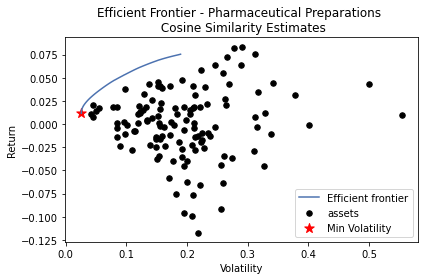

In [15]:
ef1 = EfficientFrontier(mu_Pharm, cos_sim_cov, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_Pharm, cos_sim_cov, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - Pharmaceutical Preparations \n Cosine Similarity Estimates")
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Cos_Sim.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [16]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.2%
Annual volatility: 2.6%
Sharpe Ratio: -0.32


###### Weights

In [17]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_cos_sim_Pharmaceutical_Preparations.csv", index = False)

In [18]:
pd.read_csv("data/min_vol_cos_sim_Pharmaceutical_Preparations.csv")

,Company_Name,Weight
0,ZOETIS INC.,0.20000
1,"HERON THERAPEUTICS, INC. /DE/",0.00906
2,PFIZER INC,0.20000
3,JOHNSON & JOHNSON,0.18756
4,BIOMARIN PHARMACEUTICAL INC,0.04572
5,BIOSPECIFICS TECHNOLOGIES CORP,0.07394
6,ARQULE INC,0.00068
7,"MERCK & CO., INC.",0.13753
8,PERRIGO CO PLC,0.01497
9,"PACIRA PHARMACEUTICALS, INC.",0.01883


### Results for the Other 4 Industries

In [19]:
SIC_list = [7372, 1311, 6798, 6022]
SIC_desc = ['Prepackaged Software (mass reproduction of software)', 'Crude Petroleum and Natural Gas', 
           'Real Estate Investment Trusts', 'State Commercial Banks (commercial banking)']

#### Prepackaged Software (mass reproduction of software)

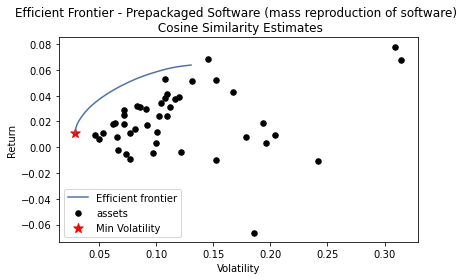

In [20]:
SIC = SIC_list[0]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

tmp = cosine_sim[LIST].T
tmp = tmp[~tmp.index.duplicated(keep="first")]
industry_cos_sim = tmp[LIST].T
industry_cos_sim = industry_cos_sim[~industry_cos_sim.index.duplicated(keep="first")]

sd = pd.DataFrame(np.sqrt(np.diag(np.diagonal(cov_sample))))
sd = sd.set_index(cov_sample.index)
sd.columns = cov_sample.index
cos_sim_cov = pd.DataFrame((np.dot(np.dot(sd, industry_cos_sim),sd)))

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Cosine Similarity Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Cosine_Similarity_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [21]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.1%
Annual volatility: 2.9%
Sharpe Ratio: -0.30


###### Weights

In [22]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_cos_sim_Prepackaged_Software.csv", index = False)

In [23]:
pd.read_csv("data/min_vol_cos_sim_Prepackaged_Software.csv")

,Company_Name,Weight
0,"Q2 HOLDINGS, INC.",0.06190
1,"ALARM.COM HOLDINGS, INC.",0.01069
2,"BLACK KNIGHT, INC.",0.20000
3,"ZEDGE, INC.",0.00391
4,GSE SYSTEMS INC,0.04031
5,"ACI WORLDWIDE, INC.",0.04754
6,NATIONAL INSTRUMENTS CORP,0.09372
7,ORACLE CORP,0.16315
8,AWARE INC /MA/,0.02316
9,"NUANCE COMMUNICATIONS, INC.",0.05947


#### Crude Petroleum and Natural Gas
When we conduct the same analysis, there is no weight shown. Efficient frontier cannot be found.

#### Real Estate Investment Trusts

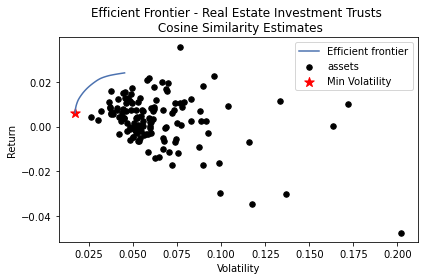

In [24]:
SIC = SIC_list[2]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

tmp = cosine_sim[LIST].T
tmp = tmp[~tmp.index.duplicated(keep="first")]
industry_cos_sim = tmp[LIST].T
industry_cos_sim = industry_cos_sim[~industry_cos_sim.index.duplicated(keep="first")]

sd = pd.DataFrame(np.sqrt(np.diag(np.diagonal(cov_sample))))
sd = sd.set_index(cov_sample.index)
sd.columns = cov_sample.index
cos_sim_cov = pd.DataFrame((np.dot(np.dot(sd, industry_cos_sim),sd)))

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Cosine Similarity Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Cosine_Similarity_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [25]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 0.6%
Annual volatility: 1.7%
Sharpe Ratio: -0.81


###### Weights

In [26]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_cos_sim_Real_Estate_Investment_Trusts.csv", index = False)

In [27]:
pd.read_csv("data/min_vol_cos_sim_Real_Estate_Investment_Trusts.csv")

,Company_Name,Weight
0,DUKE REALTY CORP,0.05369
1,ALEXANDERS INC,0.01487
2,"STARWOOD PROPERTY TRUST, INC.",0.01851
3,"GAMING & LEISURE PROPERTIES, INC.",0.06734
4,CROWN CASTLE INTERNATIONAL CORP,0.02634
5,"HEALTHCARE TRUST OF AMERICA, INC.",0.02052
6,GREAT AJAX CORP.,0.13806
7,LTC PROPERTIES INC,0.00036
8,SUN COMMUNITIES INC,0.14907
9,EQUINIX INC,0.07068


#### State Commercial Banks (commercial banking)

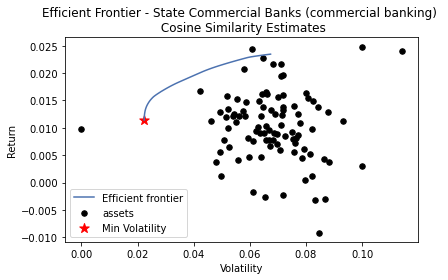

In [28]:
SIC = SIC_list[3]
    
industry_name = SIC_desc[SIC_list.index(SIC)]
    
# get the names of the companies in the other industries
Companies = df[df.SIC == SIC]
Company_list = Companies.index

# get the companies name that match return data and business description data
SET = (set(Company_list) & set(r_selected.index))
LIST = [*SET, ]

mu_sample = mu[LIST]
# get the outliers
outlier = mu_sample[mu_sample>1].index
mu_sample = mu_sample.drop(outlier)
LIST = mu_sample.index

tmp = cov[LIST].T
cov_sample = tmp[LIST]

tmp = cosine_sim[LIST].T
tmp = tmp[~tmp.index.duplicated(keep="first")]
industry_cos_sim = tmp[LIST].T
industry_cos_sim = industry_cos_sim[~industry_cos_sim.index.duplicated(keep="first")]

sd = pd.DataFrame(np.sqrt(np.diag(np.diagonal(cov_sample))))
sd = sd.set_index(cov_sample.index)
sd.columns = cov_sample.index
cos_sim_cov = pd.DataFrame((np.dot(np.dot(sd, industry_cos_sim),sd)))

# perform minimum variance analysis
ef1 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))

fig, ax = plt.subplots()
plotting.plot_efficient_frontier(ef1, ax=ax, show_assets=True)

# Find and plot the tangency portfolio
ef2 = EfficientFrontier(mu_sample, cos_sim_cov, weight_bounds=(0, 0.2))
# min volatility
ef2.min_volatility()
ret_tangent, std_tangent, _ = ef2.portfolio_performance()
ax.scatter(std_tangent, ret_tangent, marker="*", s=100, c="r", label="Min Volatility")

# Format
ax.set_title("Efficient Frontier - %s \n Cosine Similarity Estimates" %industry_name)
ax.legend()
plt.tight_layout()
plt.savefig('images/Efficient_Frontier_Cosine_Similarity_Estimates' + str(industry_name) + '.png', dpi=200, bbox_inches='tight')
plt.show()

##### Min Volatility Portfolio

###### Performance

In [29]:
ef2.portfolio_performance(verbose=True);

Expected annual return: 1.1%
Annual volatility: 2.2%
Sharpe Ratio: -0.38


###### Weights

In [30]:
companies = []
weights = []
for company, weight in ef2.clean_weights().items():
    if weight != 0:
        companies.append(company)
        weights.append(weight)
        
dic = {'Company_Name':companies,'Weight':weights}
min_vol = pd.DataFrame(dic)
min_vol.to_csv("data/min_vol_cos_sim_State_Commercial_Banks.csv", index = False)

In [31]:
pd.read_csv("data/min_vol_cos_sim_State_Commercial_Banks.csv")

,Company_Name,Weight
0,BANK OF HAWAII CORP,0.04935
1,BANK OF NEW YORK MELLON CORP,0.09816
2,EAST WEST BANCORP INC,0.08342
3,CITIZENS & NORTHERN CORP,0.11305
4,INDEPENDENT BANK CORP /MI/,0.09540
5,BANNER CORP,0.20000
6,HOWARD BANCORP INC,0.02931
7,UNITY BANCORP INC /NJ/,0.01179
8,INVESTAR HOLDING CORP,0.16789
9,"CB FINANCIAL SERVICES, INC.",0.02883
